In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import scipy
import pycountry_convert as pc
import folium
import json
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Creating path
path = r'/Users/cameronpaschall/Desktop/Project 6 - Covid'

In [4]:
# Import covid prepared data set
df_cov = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid Wrangled.csv'), index_col = False)

In [5]:
# Import covid continent prepared data set
df_cov_cont = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid Final.csv'), index_col = False)

In [6]:
%matplotlib inline

In [9]:
## Drop Unnamed Column
df_cov = df_cov.drop(columns = ['Unnamed: 0'])

In [10]:
df_cov.head()

,Code,Country,Date,Total_Cases,Total_Deaths,Stringency_Index,Population,Gdp_Per_Capita,Human_Dev_Index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [11]:
## Drop Unnamed Column
df_cov_cont = df_cov_cont.drop(columns = ['Unnamed: 0'])

In [12]:
df_cov_cont.head()

,Code,Country,Population,Total_Cases,Total_Deaths,Human_Dev_Index,Gdp_Per_Capita,Stringency_Index,Continent
0,AFG,Afghanistan,38928341,5126433.0,165875.0,0.50,1803.99,46.80,Asia
1,ALB,Albania,2877800,1071951.0,31056.0,0.60,9033.24,48.63,Europe
2,DZA,Algeria,43851043,4893999.0,206429.0,0.75,13913.84,55.05,Africa
3,AND,Andorra,77265,223576.0,9850.0,0.66,0.00,31.29,Europe
4,AGO,Angola,32866268,304005.0,11820.0,0.42,4196.37,53.22,Africa


## Create Scatterplots

In [16]:
fig = px.scatter(df_cov_cont, x="Gdp_Per_Capita", y="Total_Cases", size="Population", hover_name="Country", color='Continent', template='simple_white', size_max=50)
fig.update_layout(
    height=500,
    title_text="COVID-19 Cases vs GDP per Capita (per Country)"
)
fig.show()

In [17]:
fig = px.scatter(df_cov_cont, x='Stringency_Index', y='Total_Cases', hover_name='Country', color='Continent', size='Population', template="simple_white", size_max=50)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=500,
    title_text='COVID-19 Cases vs Stringency Index (per Country)'
)
fig.show()

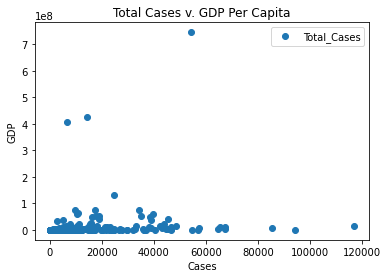

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cov_cont.plot(x = 'Gdp_Per_Capita', y='Total_Cases',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Cases v. GDP Per Capita')  
plt.xlabel('Cases')  
plt.ylabel('GDP')  
plt.show()

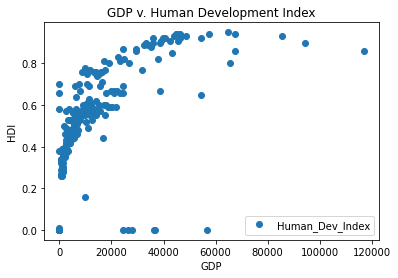

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cov_cont.plot(x = 'Gdp_Per_Capita', y='Human_Dev_Index',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP v. Human Development Index')  
plt.xlabel('GDP')  
plt.ylabel('HDI')  
plt.show()

## Hypotheses

1. The lower a country's GDP, the lower the Human development index.
2. The lower a country's GDP, the higher number of cases they have.

## Reshape into NumPy Arrays

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df_cov_cont['Gdp_Per_Capita'].values.reshape(-1,1)
y = df_cov_cont['Human_Dev_Index'].values.reshape(-1,1)

In [24]:
x

array([[1.803990e+03],
       [9.033240e+03],
       [1.391384e+04],
       [0.000000e+00],
       [4.196370e+03],
       [0.000000e+00],
       [1.564307e+04],
       [1.622906e+04],
       [8.787580e+03],
       [2.642972e+04],
       [4.464871e+04],
       [4.543669e+04],
       [1.584742e+04],
       [2.036413e+04],
       [4.329071e+04],
       [2.768840e+03],
       [1.247368e+04],
       [1.716797e+04],
       [4.236838e+04],
       [5.588830e+03],
       [1.523600e+03],
       [3.688175e+04],
       [6.605500e+03],
       [5.199500e+03],
       [0.000000e+00],
       [8.885030e+03],
       [1.086085e+04],
       [1.410345e+04],
       [0.000000e+00],
       [5.446756e+04],
       [1.414347e+04],
       [1.280220e+03],
       [4.824800e+02],
       [3.645070e+03],
       [2.552310e+03],
       [4.401759e+04],
       [4.508180e+03],
       [3.632397e+04],
       [4.903100e+02],
       [1.287020e+03],
       [1.773351e+04],
       [1.530871e+04],
       [1.032443e+04],
       [8.2

In [25]:
y

array([[0.5 ],
       [0.6 ],
       [0.75],
       [0.66],
       [0.42],
       [0.  ],
       [0.57],
       [0.71],
       [0.76],
       [0.  ],
       [0.94],
       [0.91],
       [0.76],
       [0.59],
       [0.85],
       [0.48],
       [0.59],
       [0.81],
       [0.91],
       [0.51],
       [0.38],
       [0.  ],
       [0.46],
       [0.52],
       [0.  ],
       [0.58],
       [0.49],
       [0.76],
       [0.  ],
       [0.65],
       [0.62],
       [0.32],
       [0.29],
       [0.58],
       [0.42],
       [0.93],
       [0.47],
       [0.  ],
       [0.27],
       [0.29],
       [0.66],
       [0.75],
       [0.58],
       [0.29],
       [0.45],
       [0.61],
       [0.37],
       [0.83],
       [0.58],
       [0.  ],
       [0.66],
       [0.89],
       [0.34],
       [0.93],
       [0.35],
       [0.51],
       [0.74],
       [0.75],
       [0.7 ],
       [0.49],
       [0.44],
       [0.32],
       [0.87],
       [0.35],
       [0.  ],
       [0.  ],
       [0.

In [27]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Regression Analysis

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using x.

y_predicted = regression.predict(x_test)

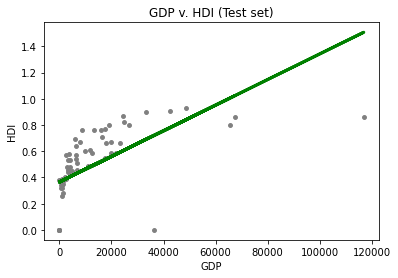

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='green', linewidth =3)
plot_test.title('GDP v. HDI (Test set)')
plot_test.xlabel('GDP')
plot_test.ylabel('HDI')
plot_test.show()

### Test interpretation
It definitely looks like the line matches the scatterplot of data. In other words, there appears to be a strong relationship between HDI and GDP

In [35]:
# Model Performance Stats

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.76734074e-06]]
Mean squared error:  0.045027632978715836
R2 score:  0.2754038864171353


In [37]:
y_predicted

array([[0.52025384],
       [0.42613907],
       [0.40106933],
       [0.36546669],
       [0.3848112 ],
       [0.3761169 ],
       [0.37548994],
       [0.39164189],
       [0.42823817],
       [1.50761654],
       [0.48203189],
       [0.60736416],
       [0.37140006],
       [0.41174064],
       [0.68908135],
       [0.39866217],
       [0.42574955],
       [0.72025528],
       [0.44179768],
       [0.77929309],
       [0.59388211],
       [0.39251089],
       [0.52398145],
       [0.43327597],
       [0.55185314],
       [0.38932635],
       [0.4040893 ],
       [0.5347979 ],
       [0.53583412],
       [0.36546669],
       [0.36546669],
       [0.46100144],
       [0.40347659],
       [0.37667393],
       [0.38202028],
       [0.39902542],
       [0.37574125],
       [0.62731112],
       [0.48730137],
       [0.83891451],
       [0.37639205],
       [0.42998486],
       [1.0055258 ],
       [0.36546669],
       [0.40645407],
       [0.39636597],
       [0.36546669],
       [0.400

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.76,0.520254
1,0.54,0.426139
2,0.58,0.401069
3,0.00,0.365467
4,0.40,0.384811
5,0.32,0.376117
6,0.38,0.375490
7,0.39,0.391642
8,0.64,0.428238
9,0.86,1.507617


In [39]:
# Predict.

y_predicted_train = regression.predict(x_train)

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.76734074e-06]]
Mean squared error:  0.05112605535006958
R2 score:  0.3881777859955958


## How the model performed-

The model performed fairly well, the mean squared error was almost the same but the R2 score was roughly 0.1 off.

### There is some data bias in this set when it comes to the misreporting of total cases in the continent of China.